## Train and test a classification model using Vehicle dataset

In this task, the objective is to 
1. build a model which classifies vehicles into four categories namely: bus, saab, opel, van 
based on the different features. 
2. compute an evaluation metric on a held-out test set

### Import Modules

In [1]:
#Import necessary libraries
import helper
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../dev')


# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


### Explanatory Data Analysis

In [2]:
#read data
data = pd.read_csv('../../datasets/vehicles.csv')
data.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [3]:
data.head().T #To view the data without scrolling to the left or right

,0,1,2,3,4
COMPACTNESS,95,91,104,93,85
CIRCULARITY,48,41,50,41,44
DISTANCE_CIRCULARITY,83,84,106,82,70
RADIUS_RATIO,178,141,209,159,205
PR.AXIS_ASPECT_RATIO,72,57,66,63,103
MAX.LENGTH_ASPECT_RATIO,10,9,10,9,52
SCATTER_RATIO,162,149,207,144,149
ELONGATEDNESS,42,45,32,46,45
PR.AXIS_RECTANGULARITY,20,19,23,19,19
MAX.LENGTH_RECTANGULARITY,159,143,158,143,144


In [4]:
data.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
helper.data_description(data)

Shape of the data:(846, 19) 



Value count of each vehicle class:
 bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64
Any Missing values? False


Data type of each column
 COMPACTNESS                   int64
CIRCULARITY                   int64
DISTANCE_CIRCULARITY          int64
RADIUS_RATIO                  int64
PR.AXIS_ASPECT_RATIO          int64
MAX.LENGTH_ASPECT_RATIO       int64
SCATTER_RATIO                 int64
ELONGATEDNESS                 int64
PR.AXIS_RECTANGULARITY        int64
MAX.LENGTH_RECTANGULARITY     int64
SCALED_VARIANCE_MAJOR         int64
SCALED_VARIANCE_MINOR         int64
SCALED_RADIUS_OF_GYRATION     int64
SKEWNESS_ABOUT_MAJOR          int64
SKEWNESS_ABOUT_MINOR          int64
KURTOSIS_ABOUT_MAJOR          int64
KURTOSIS_ABOUT_MINOR          int64
HOLLOWS_RATIO                 int64
Class                        object
dtype: object


This data contains all numerical features except the Class column which is the dependent variable(The target)

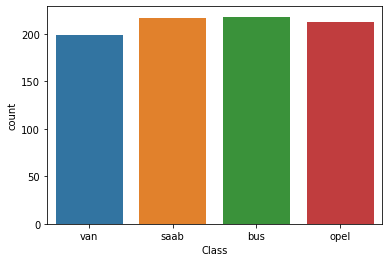

In [6]:
sns.countplot(data['Class'])

In [7]:
data_normal= data.copy()

In [8]:
#Label encodes the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Class"] = le.fit_transform(data["Class"])
data.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0


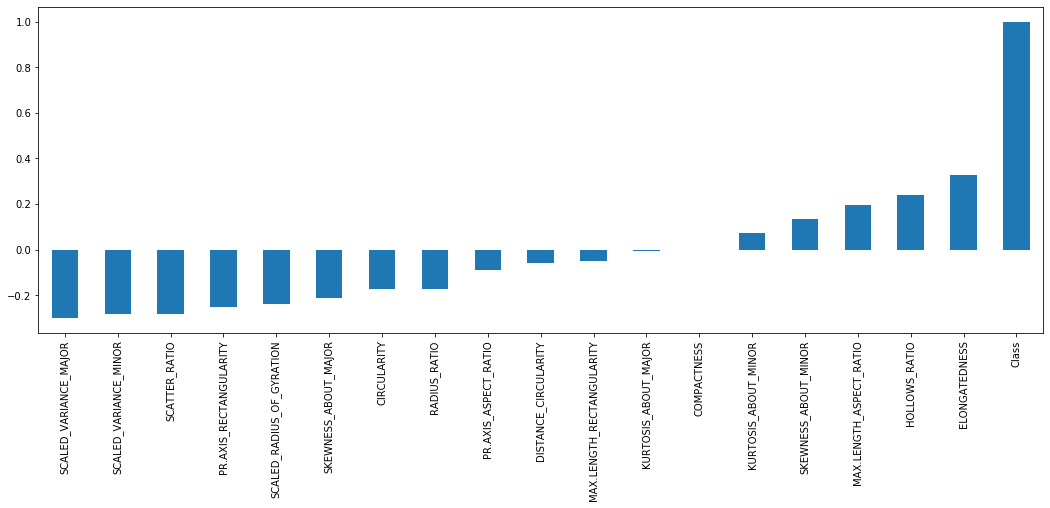

In [9]:
helper.corr_plot(data) #Shows level of importance of each column

The Visualization above shows that 
1. the following columns(ELONGATEDNESS, HOLLOWS_RATIO, MAX.LENGTH_ASPECT_RATIO,  SKEWNESS_ABOUT_MINOR) has a high positive correlation with the target column,Class.
2. The COMPACTNESS column has negligible/no correlation with the target column.

Show correlation between each positive features( in terms of importance) and the different vehicle classes 

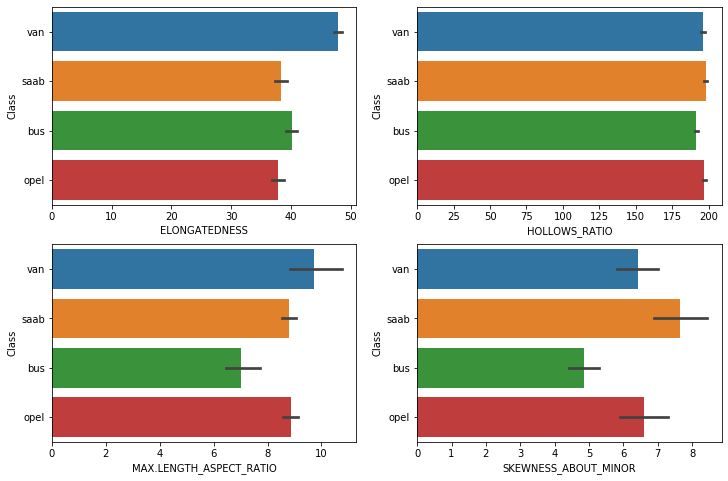

In [10]:
helper.positive_corr_plot(data_normal) 

In [11]:
X = data.drop(["Class"],axis =1) #Segregating variables- Dependent and the independent variable
X.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


In [12]:
y = pd.DataFrame(data.iloc[:,-1]) #Dependent Variable
y.head()

,Class
0,3
1,3
2,2
3,3
4,0


In [13]:
col=X.columns #Independent Variable columns

In [14]:
x= helper.scale_fit_transform_data(X, col) #scale the data 
x.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
0,0.160580,0.508950,0.057819,0.270806,1.307291,0.311542,-0.205844,0.136570,-0.224944,0.758332,-0.402383,-0.344935,0.285812,-0.329056,-0.076711,0.380991,-0.313722,0.183957
1,-0.325470,-0.626268,0.121261,-0.835244,-0.595396,0.094079,-0.597112,0.520843,-0.610954,-0.344578,-0.593611,-0.622416,-0.513517,-0.061767,0.533610,0.156925,0.010937,0.452977
2,1.254193,0.833298,1.517005,1.197496,0.546217,0.311542,1.148544,-1.144341,0.933086,0.689401,1.095564,1.104766,1.392577,0.071877,1.550812,-0.403238,-0.151393,0.049447
3,-0.082445,-0.626268,-0.005624,-0.297166,0.165679,0.094079,-0.747600,0.648935,-0.610954,-0.344578,-0.912323,-0.741337,-1.466565,-1.264566,-0.076711,-0.291206,1.634233,1.529056
4,-1.054545,-0.139746,-0.766939,1.077923,5.239511,9.444962,-0.597112,0.520843,-0.610954,-0.275646,1.669245,-0.650731,0.408786,7.288670,0.533610,-0.179173,-1.450029,-1.699181


### Splits the data into train and test set

In [15]:
x_train, x_test, y_train, y_test= helper.split(x,y)

In [16]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((634, 18), (634, 1), (212, 18), (212, 1))

Now that the data set has been successfully splitted, The best model for training and testing has to be selected

For this selection, Kfold cross validation value is set to 10 because:
1. Setting CV as 1 means the data is trained and tested on the same set of data
2. Setting CV as 2 means a 50/50 split which results to high bias as the CV is to be set so
3. Setting CV >10 results in more data for training and very little for validation
Therefore,generally, depending on the quantity of dataset available, Kfold CV is set to values betwwen 5 to 10.

KNN: 0.703122 (0.058058)
NB: 0.435339 (0.051158)
SVC: 0.744506 (0.031067)
RFC: 0.740105 (0.063853)
LR: 0.769726 (0.040348)
LDA: 0.771258 (0.049208)


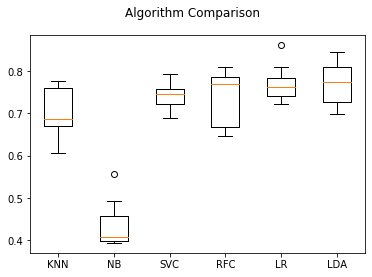

In [17]:
helper.spot_check_algorithm(x_train, y_train)


Comparing the cross validation score of the above algorithms, Linear Discriminant 
Analysis (LDA) performed better on the data.

In [18]:
y_pred = helper.train_LDA(x_train, y_train,x_test,y_test) #Train with LDA

In [19]:
y_pred.columns = ["Class"] #Assign the column name(class) to the predicted column
y_pred.head()

,Class
0,0
1,2
2,1
3,1
4,2


In [20]:
# Compare the actual vehicle class to the predicted class and 
#print the classification report,Accuracy.
Result = helper.print_results(y_test, y_pred) 

Accuracy: 81.13207547169812
              precision    recall  f1-score   support

           0       0.96      0.91      0.94        58
           1       0.62      0.77      0.69        43
           2       0.74      0.68      0.71        59
           3       0.92      0.88      0.90        52

    accuracy                           0.81       212
   macro avg       0.81      0.81      0.81       212
weighted avg       0.82      0.81      0.81       212



In [21]:
#Returns the label encoded column to categorical
y_test =le.inverse_transform(y_test)
y_test = pd.DataFrame(y_test, columns = ["Class"])

In [22]:
y_test.head()

,Class
0,bus
1,saab
2,opel
3,opel
4,opel


In [23]:
y_pred =le.inverse_transform(y_pred)
y_pred = pd.DataFrame(y_pred, columns = ["Class"])

In [24]:
y_pred.head()

,Class
0,bus
1,saab
2,opel
3,opel
4,saab


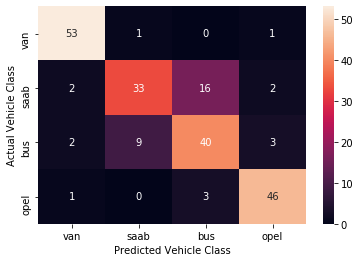

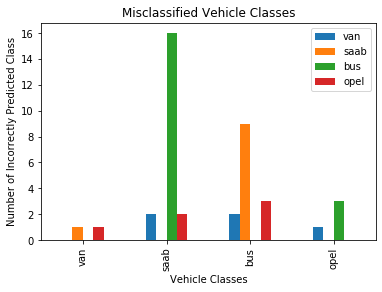

In [25]:
helper.plot_confusion_matrix(y_test, y_pred)

#### Feature Engineering

Create new column to indicate the classification for each class for both test and predicted values

In [26]:
#Van 
y_test ['Class_van'] = y_test ['Class'].apply(helper.van)
y_pred ['Class_van'] = y_pred ['Class'].apply(helper.van)

In [27]:
#saab
y_test ['Class_saab'] = y_test ['Class'].apply(helper.saab)
y_pred ['Class_saab'] = y_pred ['Class'].apply(helper.saab)

In [28]:
#bus
y_test ['Class_bus'] = y_test ['Class'].apply(helper.bus)
y_pred ['Class_bus'] = y_pred ['Class'].apply(helper.bus)

In [29]:
#opel
y_test ['Class_opel'] = y_test ['Class'].apply(helper.opel)
y_pred ['Class_opel'] = y_pred ['Class'].apply(helper.opel)

In [30]:
y_test.head()

,Class,Class_van,Class_saab,Class_bus,Class_opel
0,bus,0,0,1,0
1,saab,0,1,0,0
2,opel,0,0,0,1
3,opel,0,0,0,1
4,opel,0,0,0,1


In [31]:
y_pred.head()

,Class,Class_van,Class_saab,Class_bus,Class_opel
0,bus,0,0,1,0
1,saab,0,1,0,0
2,opel,0,0,0,1
3,opel,0,0,0,1
4,saab,0,1,0,0


### ROC CURVES
ROC curves typically features true positive rate on the Y axis, and false positive rate on the X axis.

This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.


The following curves shows the how the selected classifier has performed on the data.

#### ROC curve for Van Class

#### True positive rate
      Shows how often the model classifiers a vehicle which belong to the Van class as Van. The higher the better.

#### False positive rate
      Shows how often the model classifiers a vehicle which is not a Van class as Van. The lower the better.
      
##### This is applicable to other classes below

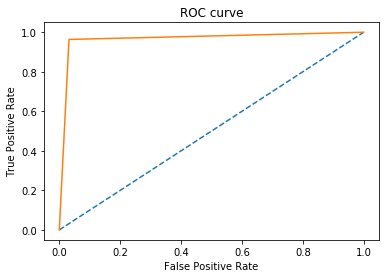

In [32]:
# keep the predictions for class 3 only
y_pred_loss = y_pred.iloc[:, 3]
y_test_loss = y_test.iloc[:, 3]
helper.plot_roc_curve(y_pred_loss,y_test_loss)

 This curve shows the true positive rate of the Van class is high, with about 96% precision as shown in the classification report, with the model correctly classifying 53(from the confusion matrix) out of 58 correctly. 
The false positive rate is close to 0 from the above curve

#### ROC curve for Opel Class

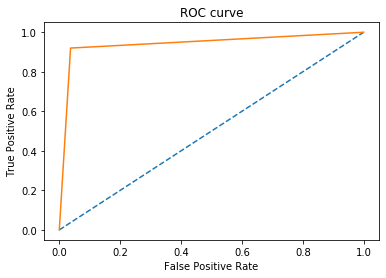

In [33]:
# keep the predictions for class 1 only
y_pred_loss = y_pred.iloc[:, 1]
y_test_loss = y_test.iloc[:, 1]
helper.plot_roc_curve(y_pred_loss,y_test_loss)

The curve above shows the true positive rate of the Opel class is high, with about 92% precision as shown in the classification report, with the model correctly classifying 46 (from the confusion matrix) out of 52 correctly. 
The false positive rate is between 0 to 20% from the above curve

#### ROC curve for bus Class

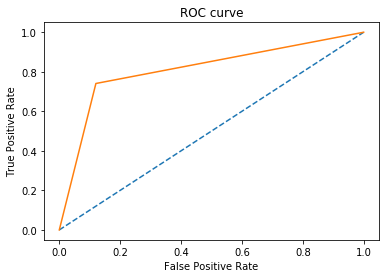

In [34]:
# keep the predictions for class 2 only
y_pred_loss = y_pred.iloc[:, 2]
y_test_loss = y_test.iloc[:, 2]
helper.plot_roc_curve(y_pred_loss,y_test_loss)

This curve shows the true positive rate of the bus class is not too high,  with about 74% precision as shown in the classification report, with the model correctly classifying 40(from the confusion matrix) out of 59 correctly. 
The false positive rate is close to between 0 to 20% from the above curve

#### ROC curve for Saab Class 

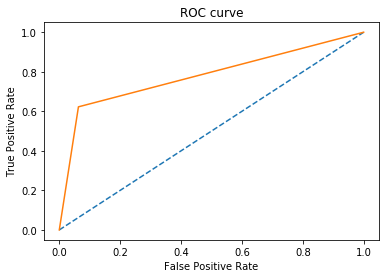

In [35]:
# keep the predictions for class 4 only
y_pred_loss = y_pred.iloc[:, 4]
y_test_loss = y_test.iloc[:, 4]
helper.plot_roc_curve(y_pred_loss,y_test_loss)

This curve shows the true positive rate of the Saab class is not high, with about 62% precision as shown in the classification report, with the model correctly classifying 33(from the confusion matrix) out of 43 correctly. 
The false positive rate is between 0 to 20% from the above curve